In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

'E:\\PTDL\\Pandas'

In [4]:
# import dataset:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
# Checking missing value
df.isnull().values.any()
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
# There is no missing value in data set.

In [11]:
# Data Cleaning
# Drop unnecessary columns
# As seen ""Unnamed: 0" . it is unnecessary variable.

drop_list = ["Unnamed: 0"]

df = df.drop(drop_list, axis=1)

df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Checking main assumptions of Linear Regression: linearity, normality, and multicollinearity.


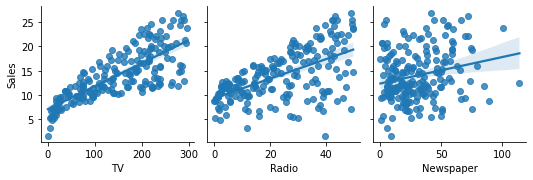

In [22]:
# 1) Assumption (Linearity)

sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

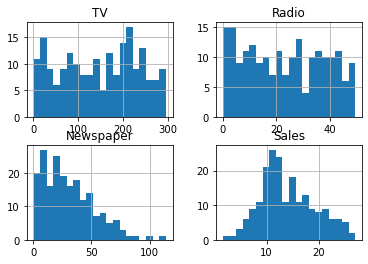

In [23]:
df.hist(bins=20)

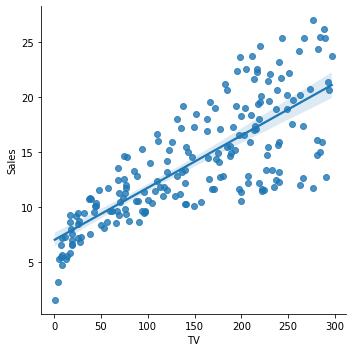

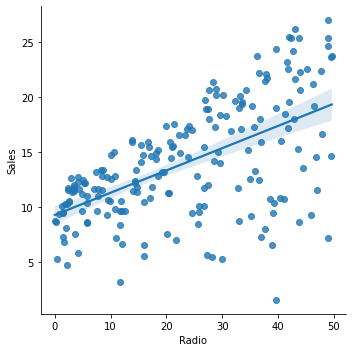

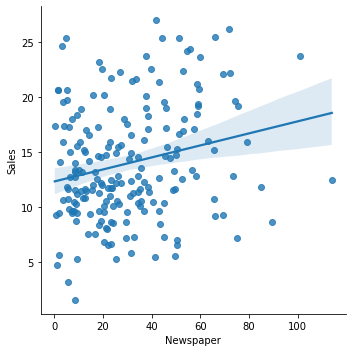

In [24]:
sns.lmplot('TV','Sales',data=df)
sns.lmplot('Radio','Sales',data=df)
sns.lmplot('Newspaper','Sales',data=df)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

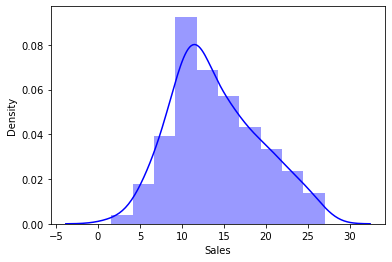

In [25]:
# 2) Assumption (Normality):
sns.distplot(df.Sales,bins=10,color="blue",hist=True)


In [26]:
# 3) Assumption (Multicollinearity):
num_cols = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


# Correlation of variables with Heatmap


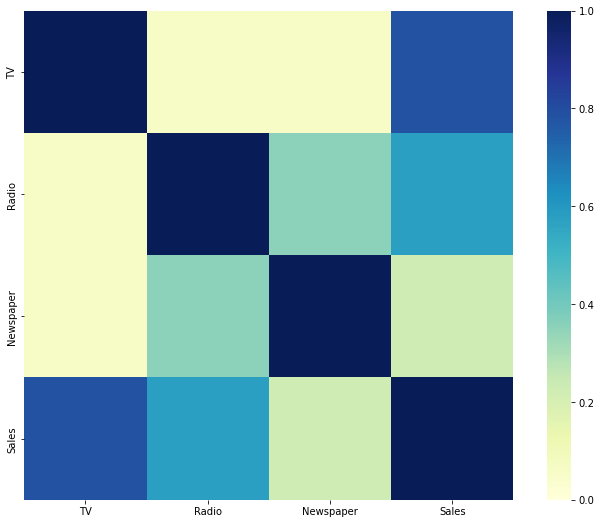

In [27]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

In [28]:
'''
As seen above, there is no multicollinearity among independent/dependent variables.
'''

'\nAs seen above, there is no multicollinearity among independent/dependent variables.\n'

# MODELLING

In [29]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [30]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper",data=df).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        15:55:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Evaluate the model


In [31]:
results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.700510
